In [ ]:
import pandas as pd
import pandas as pd
import numpy as np
import keras
import tensorflow as tf
from keras.preprocessing.sequence import TimeseriesGenerator
df = pd.read_csv("WFC.csv") 

In [ ]:
df.dropna(inplace=True)

In [ ]:
df1=df.reset_index()['Close']

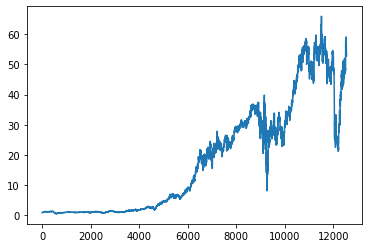

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
import numpy as np

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(8153, 4391)

In [ ]:
train_data

array([[0.00596917],
       [0.00600898],
       [0.00620794],
       ...,
       [0.44407443],
       [0.44506772],
       [0.44590818]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 50
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(8102, 50)
(8102,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(4340, 50)
(4340,)


(None, None)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(50,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 50, 50)            10400     
                                                                 
 lstm_13 (LSTM)              (None, 50, 50)            20200     
                                                                 
 lstm_14 (LSTM)              (None, 50, 50)            20200     
                                                                 
 lstm_15 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
127/127 [==============================] - 26s 158ms/step - loss: 9.0450e-04 - val_loss: 0.0085
Epoch 2/100
127/127 [==============================] - 19s 148ms/step - loss: 7.5685e-05 - val_loss: 0.0060
Epoch 3/100
127/127 [==============================] - 18s 143ms/step - loss: 8.5266e-05 - val_loss: 0.0062
Epoch 4/100
127/127 [==============================] - 18s 139ms/step - loss: 8.2441e-05 - val_loss: 0.0033
Epoch 5/100
127/127 [==============================] - 18s 138ms/step - loss: 7.0373e-05 - val_loss: 0.0023
Epoch 6/100
127/127 [==============================] - 18s 140ms/step - loss: 7.6613e-05 - val_loss: 0.0025
Epoch 7/100
127/127 [==============================] - 18s 143ms/step - loss: 6.7447e-05 - val_loss: 0.0034
Epoch 8/100
127/127 [==============================] - 18s 143ms/step - loss: 5.9500e-05 - val_loss: 0.0026
Epoch 9/100
127/127 [==============================] - 18s 143ms/step - loss: 6.4332e-05 - val_loss: 0.0023
Epoch 10/100
127/127 [======

In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

11.184314288405451

In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

39.95976914475327

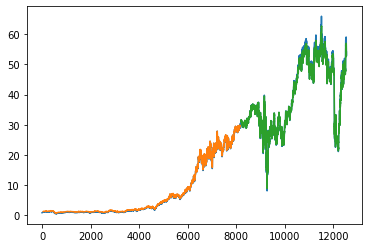

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=50
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

4391

In [ ]:
x_input=test_data[4341:].reshape(1,-1)
x_input.shape

(1, 50)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=50
i=0
while(i<30):
    
    if(len(temp_input)>50):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.8126038]
51
1 day input [0.76115676 0.72524626 0.70843704 0.72310691 0.72646872 0.73151151
 0.73777673 0.73242832 0.7328868  0.72753838 0.72570468 0.76772764
 0.79859542 0.79156614 0.81204278 0.82946319 0.83832618 0.84917579
 0.85437137 0.84825891 0.87973795 0.85880284 0.84168805 0.83297784
 0.81265397 0.80730563 0.81143152 0.8198361  0.81402927 0.82060015
 0.81464053 0.84214645 0.84718924 0.83557559 0.8533017  0.86858278
 0.89028187 0.89501902 0.89486618 0.88355821 0.87652887 0.88462789
 0.8809604  0.85055111 0.84260493 0.83725652 0.81693272 0.79798416
 0.81937769 0.81260377]
1 day output [[0.80247283]]
2 day input [0.72524626 0.70843704 0.72310691 0.72646872 0.73151151 0.73777673
 0.73242832 0.7328868  0.72753838 0.72570468 0.76772764 0.79859542
 0.79156614 0.81204278 0.82946319 0.83832618 0.84917579 0.85437137
 0.84825891 0.87973795 0.85880284 0.84168805 0.83297784 0.81265397
 0.80730563 0.81143152 0.8198361  0.81402927 0.82060015 0.81464053
 0.84214645 0.84718924 0.83557559 0.85

In [ ]:
day_new=np.arange(1,51)
day_pred=np.arange(51,81)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

12544

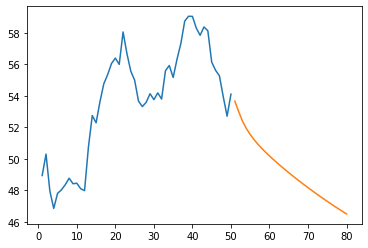

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[12494:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

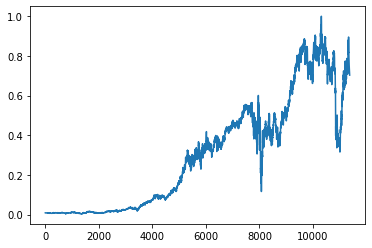

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])